In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import raschii

/home/anna/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


amplitude - distance of the highest point of the wave (crest) to the mean level  
k - wave number [1/m]    
ak - wave steepness  
omega - angular frequency - 2 pi * f  
lambda - wave length k = 2pi/lambda  

# Experiments results for all runs:

In [2]:
experiments_df = pd.DataFrame(columns=["run", "amplitude", "k", "ak", "omega", "lambda"])
experiments_df.loc[0] = ["extra_run", 0.0126, 15.6, 0.19, 12.57, 1]
experiments_df.loc[1] = ["1st_run", 0.0058, 15.95, 0.093, 12.57, 1]
experiments_df.loc[2] = ["2nd_run", 0.0026, 16.067, 0.041, 12.57, 1]
experiments_df['lambda'] = 2 * np.pi / experiments_df['k']
experiments_df.head()

,run,amplitude,k,ak,omega,lambda
0,extra_run,0.0126,15.600,0.190,12.57,0.402768
1,1st_run,0.0058,15.950,0.093,12.57,0.393930
2,2nd_run,0.0026,16.067,0.041,12.57,0.391062


# Plotting all experiments results as linear vs Stokes 2nd order, only in the most steep run ther was slight difference

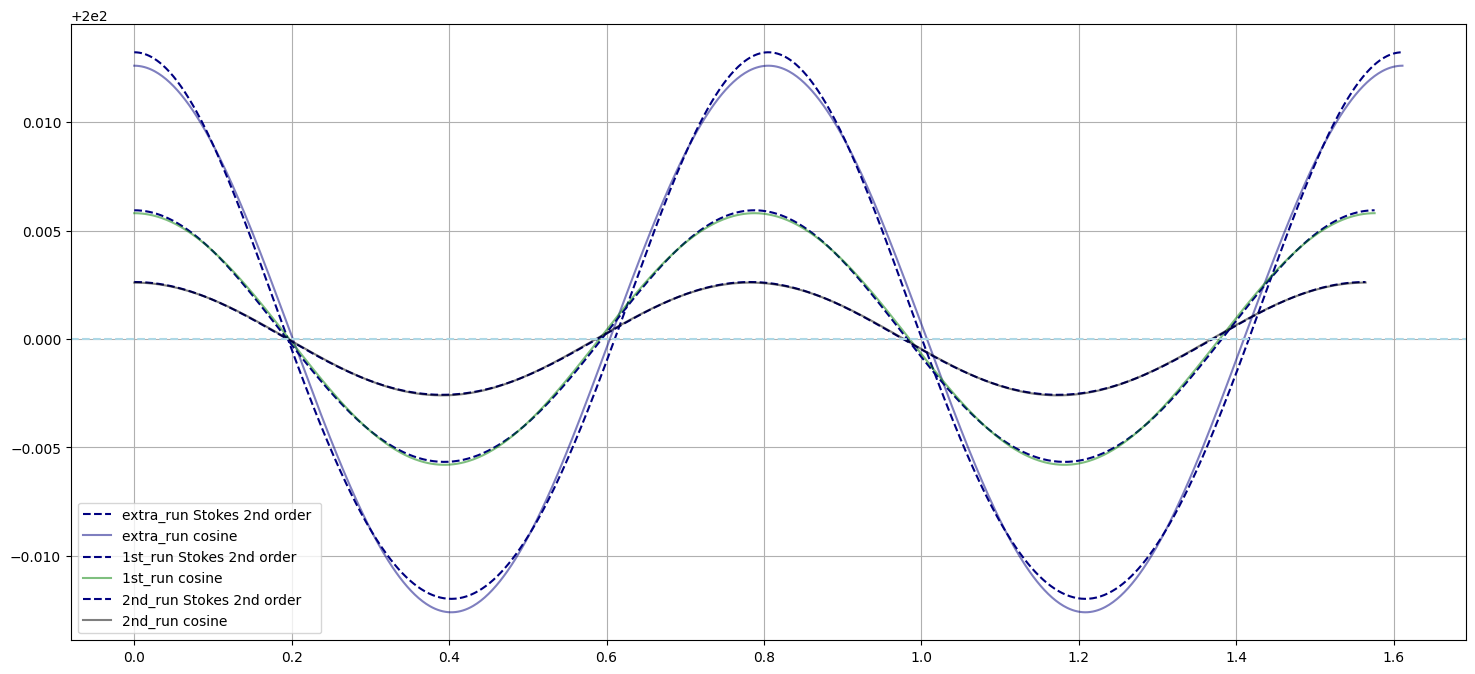

In [16]:
def plot_data_from_raschii(data_row, ax, color):
    height = 2*data_row['amplitude']
    depth = 200
    length = 2*data_row['lambda']
    wave_2nd_order = raschii.StokesWave(height=height, depth=depth, length=length , N=2)
    wave_3rd_order = raschii.StokesWave(height=height, depth=depth, length=length , N=3) 
    
    x = np.linspace(0, 2*length, 1000)
    linear_cosine  = height/2 * np.cos(2 * np.pi * x / length) + depth
    eta_2nd_order = wave_2nd_order.surface_elevation(x=x)
    eta_3rd_order = wave_3rd_order.surface_elevation(x=x)
    ax.plot(x,eta_2nd_order, color = 'navy',  linestyle='--',  label = f'{data_row['run']} Stokes 2nd order ')
    #ax.plot(x,eta_3rd_order, color = 'red', alpha = 0.5, label = f'{data_row['run']}Stokes 3rd order')
    ax.plot(x,linear_cosine, color = color, alpha = 0.5, label = f'{data_row['run']} cosine')

fig, ax = plt.subplots(figsize=(18, 8))
colors = ['navy', 'green', 'black']
for idx, data_row in experiments_df.iterrows():
    plot_data_from_raschii(data_row, ax, colors[idx])  
ax.grid(True)
ax.legend(loc='lower left')
ax.axhline(y=200, linestyle='--', color='lightblue') 
plt.show()

# Zoom in for extra run 1.2 cm amplitude

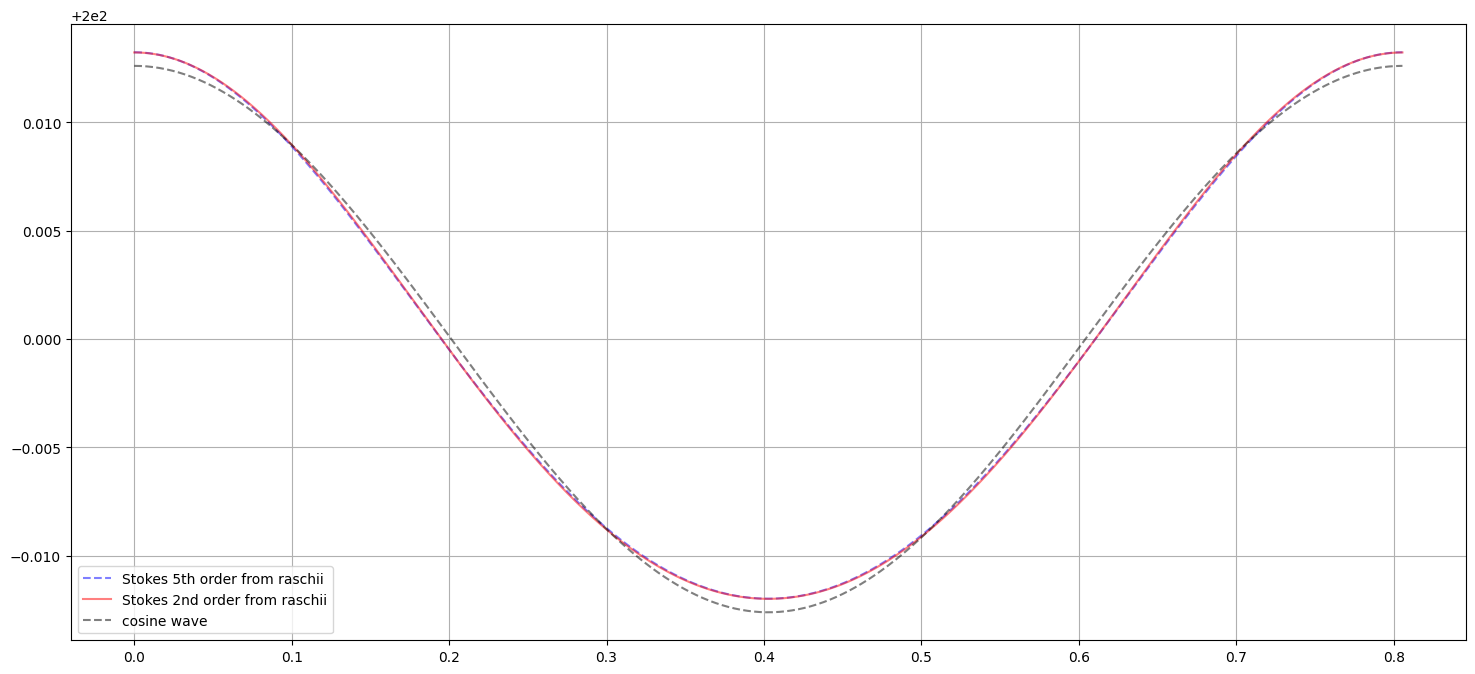

In [14]:
data_row = experiments_df.loc[0]
height = 2*data_row['amplitude']
depth = 200
length = 2*data_row['lambda']

x = np.linspace(0, length, 1000)
wave_5th_order = raschii.StokesWave(height=height, depth=depth, length=length , N=5)
wave_2nd_order = raschii.StokesWave(height=height, depth=depth, length=length , N=2)
eta_2nd_order = wave_2nd_order.surface_elevation(x=x)
eta_5th_order = wave_5th_order.surface_elevation(x=x)

linear_cosine  = height/2 * np.cos(2 * np.pi * x / length)
linear_cosine += depth
fig, ax = plt.subplots(figsize=(18, 8))
ax.grid()
_ = plt.plot(x,eta_5th_order, linestyle='--', color = 'blue', alpha = 0.5, label = 'Stokes 5th order from raschii')
_ = plt.plot(x,eta_2nd_order, linestyle='-', color = 'red', alpha = 0.5, label = 'Stokes 2nd order from raschii')
_ = plt.plot(x,linear_cosine, linestyle='--', color = 'black',alpha = 0.5, label = 'cosine wave')
_ = ax.legend()

# Zoom in for 1st run 5 mm amplitude

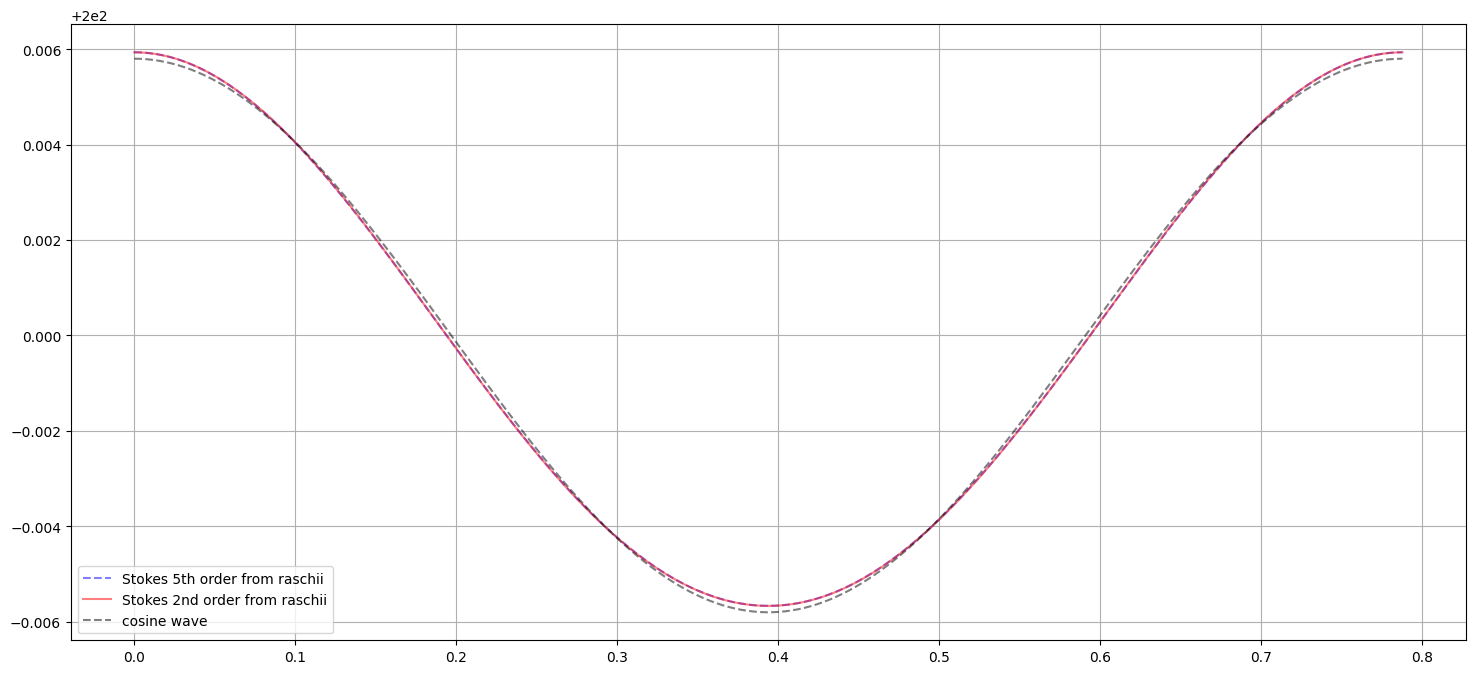

In [19]:
data_row = experiments_df.loc[1]
height = 2*data_row['amplitude']
depth = 200
length = 2*data_row['lambda']

x = np.linspace(0, length, 1000)
wave_5th_order = raschii.StokesWave(height=height, depth=depth, length=length , N=5)
wave_2nd_order = raschii.StokesWave(height=height, depth=depth, length=length , N=2)
eta_2nd_order = wave_2nd_order.surface_elevation(x=x)
eta_5th_order = wave_5th_order.surface_elevation(x=x)

linear_cosine  = height/2 * np.cos(2 * np.pi * x / length)
linear_cosine += depth
fig, ax = plt.subplots(figsize=(18, 8))
ax.grid()
_ = plt.plot(x,eta_5th_order, linestyle='--', color = 'blue', alpha = 0.5, label = 'Stokes 5th order from raschii')
_ = plt.plot(x,eta_2nd_order, linestyle='-', color = 'red', alpha = 0.5, label = 'Stokes 2nd order from raschii')
_ = plt.plot(x,linear_cosine, linestyle='--', color = 'black',alpha = 0.5, label = 'cosine wave')
_ = ax.legend()

# Zoom in for 2nd run 2.6 mm amplitude

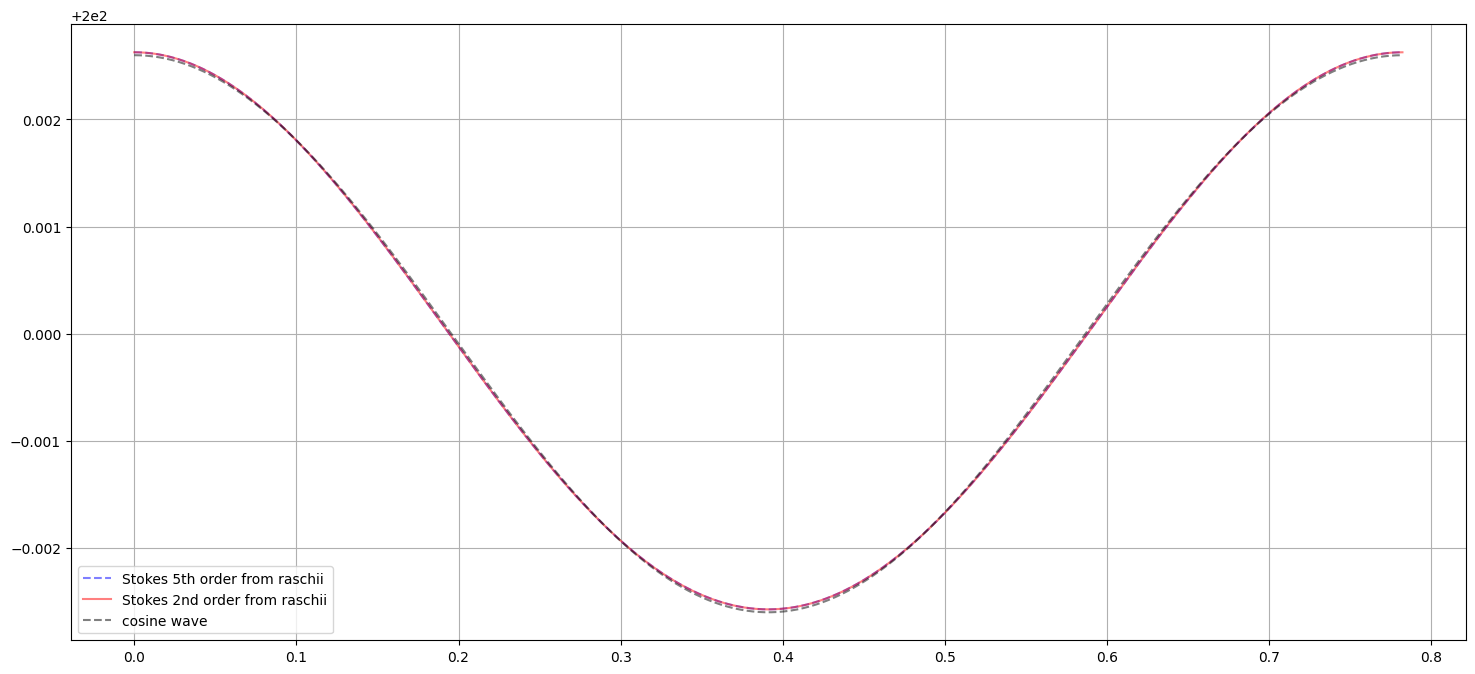

In [20]:
data_row = experiments_df.loc[2]
height = 2*data_row['amplitude']
depth = 200
length = 2*data_row['lambda']

x = np.linspace(0, length, 1000)
wave_5th_order = raschii.StokesWave(height=height, depth=depth, length=length , N=5)
wave_2nd_order = raschii.StokesWave(height=height, depth=depth, length=length , N=2)
eta_2nd_order = wave_2nd_order.surface_elevation(x=x)
eta_5th_order = wave_5th_order.surface_elevation(x=x)

linear_cosine  = height/2 * np.cos(2 * np.pi * x / length)
linear_cosine += depth
fig, ax = plt.subplots(figsize=(18, 8))
ax.grid()
_ = plt.plot(x,eta_5th_order, linestyle='--', color = 'blue', alpha = 0.5, label = 'Stokes 5th order from raschii')
_ = plt.plot(x,eta_2nd_order, linestyle='-', color = 'red', alpha = 0.5, label = 'Stokes 2nd order from raschii')
_ = plt.plot(x,linear_cosine, linestyle='--', color = 'black',alpha = 0.5, label = 'cosine wave')
_ = ax.legend()

In [ ]:
# Ma

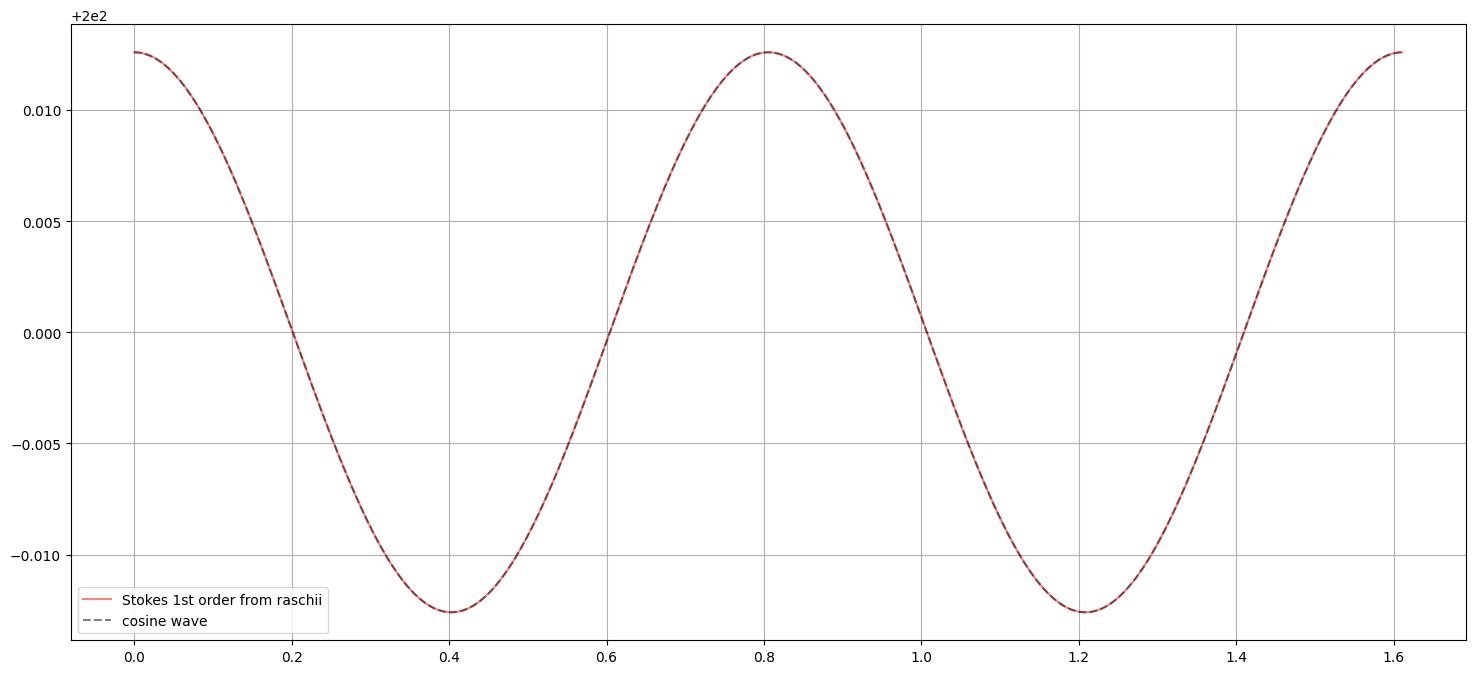

In [4]:
data_row = experiments_df.loc[0]
height = 2*data_row['amplitude']
depth = 200
length = 2*data_row['lambda']

x = np.linspace(0, 2*length, 1000)
wave_1st_order = raschii.StokesWave(height=height, depth=depth, length=length , N=1)
eta_1st_order = wave_1st_order.surface_elevation(x=x)

linear_cosine  = height/2 * np.cos(2 * np.pi * x / length)
linear_cosine += depth
fig, ax = plt.subplots(figsize=(18, 8))
ax.grid()
_ = plt.plot(x,eta_1st_order, linestyle='-', color = 'red', alpha = 0.5, label = 'Stokes 1st order from raschii')
_ = plt.plot(x,linear_cosine, linestyle='--', color = 'black',alpha = 0.5, label = 'cosine wave')
_ = ax.legend()
